**Betting Edge**
**Exploratory Data Analysis**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
excelSheet = pd.ExcelFile('/Users/mychalortiz/Downloads/Brainstation/BettingEdge/data/FantasyFootballWeekly.xlsx')
#reading in excel file to 'excelSheet'

print(excelSheet.sheet_names)
#printing sheet names

['FF_Week4_edit.csv', 'FF_Week1_edit.csv', 'FF_Week3_edit.csv', 'FF_Week5_edit.csv', 'FF_Week11_edit.csv', 'FF_Week13_edit.csv', 'FF_Week9_edit.csv', 'FF_Week14_edit.csv', 'FF_Week18_edit.csv', 'FF_Week10_edit.csv', 'FF_Week12_edit.csv', 'FF_Week16_edit.csv', 'FF_Week17_edit.csv', 'FF_Week2_edit.csv', 'FF_Week15_edit.csv', 'FF_Week8_edit.csv', 'FF_Week7_edit.csv', 'FF_Week6_edit.csv']


- Importing data as an .xlxs

In [5]:
dataframes = []
#list storing each sheet's dataframe

for sheet_name in excelSheet.sheet_names:
    # Read the sheet into a DataFrame
    weekly_data = excelSheet.parse(sheet_name)

    week_number = int(sheet_name.split('_')[1][4:])
    #extracting the number after "Week"

    weekly_data['Week'] = week_number
    #Adding column for week
    
    # Append the DataFrame to the list
    dataframes.append(weekly_data)

#looping through each sheet name, reading it as a DataFrame, and extracting the week number

dfAll = pd.concat(dataframes, ignore_index=True)
#concatenating all DataFrames into a single DataFrame called 'dfAll'

- Converting data into a dataframe

In [6]:
dfAll.head(5)
#previewing new dataframe to ensure that everything has ran correctly

,Unnamed: 0,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,...,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week
0,0,Christian McCaffrey,SF,RB,W 35-16,21.1,0.0,0.0,0.0,20.0,...,0.0,0.0,48.7,0.0,0.0,Ari,Home,1.0,10-03-23,4
1,1,A.J. Brown,Phi,WR,W 34-31,15.7,0.0,0.0,0.0,0.0,...,0.0,0.0,38.5,0.0,0.0,Wsh,Home,1.0,10-03-23,4
2,2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,...,0.0,0.0,36.5,21.0,25.0,Mia,Home,1.0,10-03-23,4
3,3,Stefon Diggs,Buf,WR,W 48-20,17.8,0.0,0.0,0.0,0.0,...,0.0,0.0,36.0,0.0,0.0,Mia,Home,2.0,10-03-23,4
4,4,Nico Collins,Hou,WR,W 30-6,12.2,0.0,0.0,0.0,0.0,...,0.0,0.0,35.8,0.0,0.0,Pit,Home,3.0,10-03-23,4


- After reviewing the data we can see it contains performance metrics for certain offensive positions in the 2023 NFL season 
    - Only certain positions are used in fantasy, due to the fact that certain position's performance are difficult to measure through statistics
    - The only positions used in the vast majority of fantasy football leagues are quarterback, runningback, wide receiver, and tight end
- The data includes player names, teams, positions, game outcomes, projected points, and key stats in passing, rushing, and miscellaneous categories
- The data is structured to analyze player performance for specific weeks, helping with player comparisons, tracking projections vs. actuals, and identifying top performers

In [7]:
dfAll.shape

(18090, 27)

- Checking the shape of the dataframe
    - 18,090 rows
    - 26 columns

In [8]:
dfAll.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
#using drop function in order to remove unnecessary column

dfAll.head(5)
#previewing dataframe to ensure that it has been dropped

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week
0,Christian McCaffrey,SF,RB,W 35-16,21.1,0.0,0.0,0.0,20.0,106.0,...,0.0,0.0,48.7,0.0,0.0,Ari,Home,1.0,10-03-23,4
1,A.J. Brown,Phi,WR,W 34-31,15.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,38.5,0.0,0.0,Wsh,Home,1.0,10-03-23,4
2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,17.0,...,0.0,0.0,36.5,21.0,25.0,Mia,Home,1.0,10-03-23,4
3,Stefon Diggs,Buf,WR,W 48-20,17.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.0,0.0,0.0,Mia,Home,2.0,10-03-23,4
4,Nico Collins,Hou,WR,W 30-6,12.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,35.8,0.0,0.0,Pit,Home,3.0,10-03-23,4


- Removing unnecessary column ('Unnamed: 0')

**Dealing with Duplicates/Nulls**

- Checking for duplicate rows within main dataframe
    - I will be dropping these rows being that there are only 4 duplicates out of 18,090 rows

In [9]:
dfAll = dfAll.drop_duplicates()

- Dropping duplicates

In [10]:
print('Duplicated rows: ', dfAll.duplicated().sum())

Duplicated rows:  0


- Ensuring that the duplicate rows have been dropped

In [11]:
dfAll.isnull().sum()
#checking for null values

PLAYER NAME               0
PLAYER TEAM               0
PLAYER POSITION           0
STATUS                 7067
PROJ                   7097
PASSING YDS           11011
PASSING TD            11011
PASSING INT           11011
RUSHING CAR           11011
RUSHING YDS           11011
RUSHING TD            11011
RECEIVING REC         11011
RECEIVING YDS         11011
RECEIVING TD          11011
RECEIVING TAR         11011
MISC 2PC              11011
MISC FUML             11011
MISC TD               11011
TOTAL                 11060
PASSING COMPLETION    11011
PASSING ATTEMPTS      11011
Opponent               6425
Location                  0
rank                  11060
DATE                      0
Week                      0
dtype: int64

- Columns like player name, player team, and player position have no null values
- Non-Essential columns such as passing yards might represent stats that only apply to certain positions
    - For example, quarterbacks may have passing yard filled, while a running back wont
    - One possible solution is to impute these values with 0
- In order to deal with these nulls, I will handle them on a position by position basis by creating a dataframe for each position

In [12]:
qbs = dfAll[dfAll['PLAYER POSITION'] == 'QB']
#making dataframe with soley quarterback data

qbs.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week
2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,17.0,...,0.0,0.0,36.50,21.0,25.0,Mia,Home,1.0,10-03-23,4
7,Anthony Richardson,Ind,QB,L 23-29,20.2,200.0,2.0,0.0,10.0,56.0,...,1.0,0.0,29.60,11.0,25.0,LAR,Home,2.0,10-03-23,4
8,Lamar Jackson,Bal,QB,W 28-3,17.9,186.0,2.0,0.0,9.0,27.0,...,1.0,0.0,28.14,15.0,19.0,Cle,Away,3.0,10-03-23,4
10,Justin Fields,Chi,QB,L 28-31,20.0,335.0,4.0,1.0,4.0,25.0,...,1.0,0.0,27.90,28.0,35.0,Den,Home,4.0,10-03-23,4
20,Jalen Hurts,Phi,QB,W 34-31,21.7,319.0,2.0,0.0,9.0,34.0,...,0.0,0.0,24.16,25.0,37.0,Wsh,Home,5.0,10-03-23,4


In [13]:
rbs = dfAll[dfAll['PLAYER POSITION'] == 'RB']
#making dataframe with soley quarterback data

rbs.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week
0,Christian McCaffrey,SF,RB,W 35-16,21.1,0.0,0.0,0.0,20.0,106.0,...,0.0,0.0,48.7,0.0,0.0,Ari,Home,1.0,10-03-23,4
5,David Montgomery,Det,RB,W 34-20,12.7,0.0,0.0,0.0,32.0,121.0,...,0.0,0.0,34.1,0.0,0.0,GB,Away,2.0,10-03-23,4
9,Josh Jacobs,LV,RB,L 17-24,15.2,0.0,0.0,0.0,17.0,58.0,...,0.0,0.0,27.9,0.0,0.0,LAC,Away,3.0,10-03-23,4
11,Kyren Williams,LAR,RB,W 29-23,18.0,0.0,0.0,0.0,25.0,103.0,...,0.0,0.0,27.7,0.0,0.0,Ind,Away,4.0,10-03-23,4
14,De'Von Achane,Mia,RB,L 20-48,12.6,0.0,0.0,0.0,8.0,101.0,...,0.0,0.0,27.0,0.0,0.0,Buf,Away,5.0,10-03-23,4


In [14]:
wrs = dfAll[dfAll['PLAYER POSITION'] == 'WR']
#making dataframe with soley wide receiver data

wrs.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week
1,A.J. Brown,Phi,WR,W 34-31,15.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,38.5,0.0,0.0,Wsh,Home,1.0,10-03-23,4
3,Stefon Diggs,Buf,WR,W 48-20,17.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.0,0.0,0.0,Mia,Home,2.0,10-03-23,4
4,Nico Collins,Hou,WR,W 30-6,12.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,35.8,0.0,0.0,Pit,Home,3.0,10-03-23,4
6,Puka Nacua,LAR,WR,W 29-23,14.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,31.3,0.0,0.0,Ind,Away,4.0,10-03-23,4
13,DJ Moore,Chi,WR,L 28-31,12.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.1,0.0,0.0,Den,Home,5.0,10-03-23,4


In [15]:
tes = dfAll[dfAll['PLAYER POSITION'] == 'TE']
#making dataframe with soley tight end data

tes.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week
12,Cole Kmet,Chi,TE,L 28-31,7.6,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,27.6,0.0,0.0,Den,Home,1.0,10-03-23,4
17,Mark Andrews,Bal,TE,W 28-3,12.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,0.0,0.0,Cle,Away,2.0,10-03-23,4
49,Jonnu Smith,Atl,TE,L 7-23,6.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.5,0.0,0.0,Jax,Away,3.0,10-03-23,4
57,Jake Ferguson,Dal,TE,W 38-3,8.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.7,0.0,0.0,NE,Home,4.0,10-03-23,4
63,Drew Ogletree,Ind,TE,L 23-29,2.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.8,0.0,0.0,LAR,Home,5.0,10-03-23,4


- Creating dataframes for each of position

In [16]:
qbs.isnull().sum()

PLAYER NAME              0
PLAYER TEAM              0
PLAYER POSITION          0
STATUS                 733
PROJ                   738
PASSING YDS           1683
PASSING TD            1683
PASSING INT           1683
RUSHING CAR           1683
RUSHING YDS           1683
RUSHING TD            1683
RECEIVING REC         1683
RECEIVING YDS         1683
RECEIVING TD          1683
RECEIVING TAR         1683
MISC 2PC              1683
MISC FUML             1683
MISC TD               1683
TOTAL                 1685
PASSING COMPLETION    1683
PASSING ATTEMPTS      1683
Opponent               638
Location                 0
rank                  1685
DATE                     0
Week                     0
dtype: int64

- Since metrics like passing stats are essential for quarterbacks, they should ideally have minimal nulls
    - These are likely null due to quarterbacks not playing throwing that game, so I will fill them with zeros as they represent zero activity
    - I will do the same for the other performance related metrics

In [17]:
qbs['PASSING YDS'] = qbs['PASSING YDS'].fillna(0)
qbs['PASSING TD'] = qbs['PASSING TD'].fillna(0)
qbs['PASSING INT'] = qbs['PASSING INT'].fillna(0)
qbs['RUSHING CAR'] = qbs['RUSHING CAR'].fillna(0)
qbs['RUSHING YDS'] = qbs['RUSHING YDS'].fillna(0)
qbs['RUSHING TD'] = qbs['RUSHING TD'].fillna(0)
qbs['RECEIVING REC'] = qbs['RECEIVING REC'].fillna(0)
qbs['RECEIVING YDS'] = qbs['RECEIVING YDS'].fillna(0)
qbs['RECEIVING TD'] = qbs['RECEIVING TD'].fillna(0)
qbs['RECEIVING TAR'] = qbs['RECEIVING TAR'].fillna(0)
qbs['MISC 2PC'] = qbs['MISC 2PC'].fillna(0)
qbs['MISC FUML'] = qbs['MISC FUML'].fillna(0)
qbs['MISC TD'] = qbs['MISC TD'].fillna(0)
qbs['PASSING COMPLETION'] = qbs['PASSING COMPLETION'].fillna(0)
qbs['PASSING ATTEMPTS'] = qbs['PASSING ATTEMPTS'].fillna(0)

/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/83147638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs['PASSING YDS'] = qbs['PASSING YDS'].fillna(0)
/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/83147638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs['PASSING TD'] = qbs['PASSING TD'].fillna(0)
/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/83147638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [18]:
qbs['STATUS']

2        W 48-20
7        L 23-29
8         W 28-3
10       L 28-31
20       W 34-31
          ...   
17906        NaN
17909        NaN
17910        NaN
17911        NaN
17912        NaN
Name: STATUS, Length: 2379, dtype: object

- After dealing with the other performance related metrics, 'STATUS', 'PROK', 'TOTAL', 'Opponent', and 'rank' still have a significant number of nulls
- Starting with 'STATUS'
    - This columns contains information on if the game was won or lost, for example ('L 23-29')
    - These null values are likely due to players being free agents


In [19]:
print(qbs['PLAYER TEAM'].unique())

['Buf' 'Ind' 'Bal' 'Chi' 'Phi' 'Ari' 'LAC' 'TB' 'Den' 'Hou' 'SF' 'Wsh'
 'NYJ' 'GB' 'Jax' 'LAR' 'Dal' 'Mia' 'KC' 'Ten' 'Det' 'LV' 'Min' 'Sea'
 'NYG' 'Car' 'Atl' 'Cin' 'Pit' 'NO' 'NE' 'Cle' 'FA']


- Ensuring that free agents are included in the dataset

In [20]:
qbs['Free_Agent'] = qbs['PLAYER TEAM'] == 'FA'

free_agent_null_status = qbs[(qbs['STATUS'].isnull()) & (qbs['Free_Agent'] == True)]

print(f"Number of free agents with missing STATUS: {len(free_agent_null_status)}")
#checking how many rows with missing STATUS are free agents

Number of free agents with missing STATUS: 638


/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/490342226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs['Free_Agent'] = qbs['PLAYER TEAM'] == 'FA'


- Creating dummy variable to help determine whether or not players are free agents in order to inspect if nulls are being caused by free agents

In [21]:
qbs.loc[(qbs['STATUS'].isnull()) & (qbs['Free_Agent'] == True), 'STATUS'] = 'No Team'

- Imputing null 'STATUS' values for free agents with 'No Team'

In [22]:
non_free_agent_null_status = qbs[(qbs['STATUS'].isnull()) & (qbs['Free_Agent'] == False)]
#filtering for rows where STATUS is null but the player is not a free agent

print(non_free_agent_null_status.head())
#inspecting the data

         PLAYER NAME PLAYER TEAM PLAYER POSITION STATUS  PROJ  PASSING YDS  \
3560  Justin Herbert         LAC              QB    NaN   NaN          0.0   
3568  Deshaun Watson         Cle              QB    NaN   NaN          0.0   
3570      Geno Smith         Sea              QB    NaN   NaN          0.0   
3581  Baker Mayfield          TB              QB    NaN   NaN          0.0   
3592       Tom Brady          TB              QB    NaN   NaN          0.0   

      PASSING TD  PASSING INT  RUSHING CAR  RUSHING YDS  ...  MISC TD  TOTAL  \
3560         0.0          0.0          0.0          0.0  ...      0.0    NaN   
3568         0.0          0.0          0.0          0.0  ...      0.0    NaN   
3570         0.0          0.0          0.0          0.0  ...      0.0    NaN   
3581         0.0          0.0          0.0          0.0  ...      0.0    NaN   
3592         0.0          0.0          0.0          0.0  ...      0.0    NaN   

      PASSING COMPLETION  PASSING ATTEMPTS  Oppone

- After dealing with free agents, there are still null values left
- It seems as though 'STATUS' is missing for non free agents because they had a bye week
    - Bye weeks are weeks in which teams do not have a game

In [23]:
qbs.loc[(qbs['STATUS'].isnull()) & (qbs['Free_Agent'] == False), 'STATUS'] = 'Bye Week'

- Imputing 'STATUS' with 'Bye Week' for non free agents

In [24]:
qbs.dtypes

PLAYER NAME            object
PLAYER TEAM            object
PLAYER POSITION        object
STATUS                 object
PROJ                  float64
PASSING YDS           float64
PASSING TD            float64
PASSING INT           float64
RUSHING CAR           float64
RUSHING YDS           float64
RUSHING TD            float64
RECEIVING REC         float64
RECEIVING YDS         float64
RECEIVING TD          float64
RECEIVING TAR         float64
MISC 2PC              float64
MISC FUML             float64
MISC TD               float64
TOTAL                 float64
PASSING COMPLETION    float64
PASSING ATTEMPTS      float64
Opponent               object
Location               object
rank                  float64
DATE                   object
Week                    int64
Free_Agent               bool
dtype: object

In [25]:
qbs.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week,Free_Agent
2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,17.0,...,0.0,36.50,21.0,25.0,Mia,Home,1.0,10-03-23,4,False
7,Anthony Richardson,Ind,QB,L 23-29,20.2,200.0,2.0,0.0,10.0,56.0,...,0.0,29.60,11.0,25.0,LAR,Home,2.0,10-03-23,4,False
8,Lamar Jackson,Bal,QB,W 28-3,17.9,186.0,2.0,0.0,9.0,27.0,...,0.0,28.14,15.0,19.0,Cle,Away,3.0,10-03-23,4,False
10,Justin Fields,Chi,QB,L 28-31,20.0,335.0,4.0,1.0,4.0,25.0,...,0.0,27.90,28.0,35.0,Den,Home,4.0,10-03-23,4,False
20,Jalen Hurts,Phi,QB,W 34-31,21.7,319.0,2.0,0.0,9.0,34.0,...,0.0,24.16,25.0,37.0,Wsh,Home,5.0,10-03-23,4,False


In [26]:
qbs.loc[(qbs['Opponent'].isnull()), 'Opponent'] = 'Unknown'

In [27]:
qbs.loc[(qbs['TOTAL'].isnull()), 'TOTAL'] = 0

In [28]:
qbs.loc[(qbs['PROJ'].isnull()), 'PROJ'] = 0

In [29]:
dnp_weeks = qbs[qbs['rank'].isna() | qbs['TOTAL'].isna()]
dnp_weeks.head(5)
#checking to see if players with null 'rank' did not play based on missing rank or points

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week,Free_Agent
301,Deshaun Watson,Cle,QB,L 3-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Bal,Home,NaN,10-03-23,4,False
315,Aaron Rodgers,NYJ,QB,L 20-23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,KC,Home,NaN,10-03-23,4,False
317,Kyler Murray,Ari,QB,L 16-35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,SF,Away,NaN,10-03-23,4,False
318,Jimmy Garoppolo,LV,QB,L 17-24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,LAC,Away,NaN,10-03-23,4,False
346,Tom Brady,TB,QB,W 26-9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NO,Away,NaN,10-03-23,4,False


In [30]:
dnp_weeks['TOTAL'].value_counts()

0.0    1685
Name: TOTAL, dtype: int64

- After creating a new dataframe with all of the players with a null 'rank', it is apparent that all of the nulls in the dataframe are caused by these players
    - This, as well as taking a look at a few rows in the dataframe, indicates that the values are null because the players did not play that week (due to injury, being benched, etc.)

In [31]:
qbs['did_not_play'] = qbs['rank'].isna().astype(int)
#creating a 'did_not_play' indicator column

/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/3495834461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs['did_not_play'] = qbs['rank'].isna().astype(int)


- Creating a dummy variable to indicate whether or not the player did not play, in order to ensure I do not take these into account when creating the models

In [32]:
didnotplay = qbs[qbs['did_not_play'] == 1]
didnotplay.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week,Free_Agent,did_not_play
301,Deshaun Watson,Cle,QB,L 3-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Bal,Home,NaN,10-03-23,4,False,1
315,Aaron Rodgers,NYJ,QB,L 20-23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,KC,Home,NaN,10-03-23,4,False,1
317,Kyler Murray,Ari,QB,L 16-35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SF,Away,NaN,10-03-23,4,False,1
318,Jimmy Garoppolo,LV,QB,L 17-24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,LAC,Away,NaN,10-03-23,4,False,1
346,Tom Brady,TB,QB,W 26-9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NO,Away,NaN,10-03-23,4,False,1


- Creating new dataframe to make sure that the value 1 was assigned to 'did_not_play' for player who did not in fact play
    - May be a bit redundant

In [33]:
qbs = qbs.drop(qbs[qbs['did_not_play'] == 1].index)
#dropping rows with players that did not play
qbs['did_not_play'].value_counts()
#ensuring rows where 'did_not_play' = 1 were dropped

0    694
Name: did_not_play, dtype: int64

- Since the focus is on predicting or analyzing stats for active players, I am dropping DNP rows because it keeps the dataset relevant and avoids potential noise from inactive weeks
- Removing DNP rows ensures the model isn’t affected by placeholder values or missing ranks, which could skew results

In [34]:
qbs.isnull().sum()

PLAYER NAME           0
PLAYER TEAM           0
PLAYER POSITION       0
STATUS                0
PROJ                  0
PASSING YDS           0
PASSING TD            0
PASSING INT           0
RUSHING CAR           0
RUSHING YDS           0
RUSHING TD            0
RECEIVING REC         0
RECEIVING YDS         0
RECEIVING TD          0
RECEIVING TAR         0
MISC 2PC              0
MISC FUML             0
MISC TD               0
TOTAL                 0
PASSING COMPLETION    0
PASSING ATTEMPTS      0
Opponent              0
Location              0
rank                  0
DATE                  0
Week                  0
Free_Agent            0
did_not_play          0
dtype: int64

- Ensuring that there are no more null rows

- Worked on only the 'qbs' dataframe first as I found it easier to go through the trial and error process with only one dataframe
- I will now perform the same cleaning methods on the rest of the position related dataframes

In [35]:
dataframes = [rbs, tes, wrs]
#making list of dataframes

columns_to_fill = [
    'PASSING YDS', 'PASSING TD', 'PASSING INT',
    'RUSHING CAR', 'RUSHING YDS', 'RUSHING TD',
    'RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD',
    'RECEIVING TAR', 'MISC 2PC', 'MISC FUML',
    'MISC TD', 'PASSING COMPLETION', 'PASSING ATTEMPTS', 'TOTAL', 'PROJ'
]
#listing columns to fill with 0

for df in dataframes:
    for column in columns_to_fill:
        if column in df.columns:
            df[column] = df[column].fillna(0)
#looping through each dataframe and fill NaN values in each specified column with 0

/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/953358741.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(0)


- Automating the process of removing the nulls for certain columns for the rest of the position-related dataframes
- Used a nested for loop to loop through dataframes and columns

In [36]:
rbs.loc[(rbs['Opponent'].isnull()), 'Opponent'] = 'Unknown'
tes.loc[(tes['Opponent'].isnull()), 'Opponent'] = 'Unknown'
wrs.loc[(wrs['Opponent'].isnull()), 'Opponent'] = 'Unknown'
#Setting opponent to 'unkown' for null values

- Removing nulls in 'Opponent' column by setting them to 'Unkown'

In [37]:
rbs.loc[(rbs['TOTAL'].isnull()), 'TOTAL'] = 0
tes.loc[(tes['TOTAL'].isnull()), 'TOTAL'] = 0
wrs.loc[(wrs['TOTAL'].isnull()), 'TOTAL'] = 0
#setting null totals to 0

- Removing nulls in 'TOTAL' column by setting them to 0

In [38]:
rbs.loc[(rbs['PROJ'].isnull()), 'PROJ'] = 0
tes.loc[(tes['PROJ'].isnull()), 'PROJ'] = 0
wrs.loc[(wrs['PROJ'].isnull()), 'PROJ'] = 0
#setting null projected to 0

In [39]:
rbs['Free_Agent'] = rbs['PLAYER TEAM'] == 'FA'
tes['Free_Agent'] = tes['PLAYER TEAM'] == 'FA'
wrs['Free_Agent'] = wrs['PLAYER TEAM'] == 'FA'

/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/234429041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rbs['Free_Agent'] = rbs['PLAYER TEAM'] == 'FA'
/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/234429041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['Free_Agent'] = tes['PLAYER TEAM'] == 'FA'
/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/234429041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [40]:
rbs.loc[(qbs['STATUS'].isnull()) & (rbs['Free_Agent'] == True), 'STATUS'] = 'No Team'
tes.loc[(qbs['STATUS'].isnull()) & (tes['Free_Agent'] == True), 'STATUS'] = 'No Team'
wrs.loc[(qbs['STATUS'].isnull()) & (wrs['Free_Agent'] == True), 'STATUS'] = 'No Team'

- Setting 'STATUS' to 'No Team' for free agents

In [41]:
rbs.loc[(qbs['STATUS'].isnull()) & (rbs['Free_Agent'] == False), 'STATUS'] = 'Bye Week'
wrs.loc[(qbs['STATUS'].isnull()) & (wrs['Free_Agent'] == False), 'STATUS'] = 'Bye Week'
tes.loc[(qbs['STATUS'].isnull()) & (tes['Free_Agent'] == False), 'STATUS'] = 'Bye Week'

- Setting 'STATUS' to 'Bye Week' for players that are not free agents, and have null 'STATUS'
    - As mentioned previusly this is because even if players to do not play in a game, they would still have data in the 'STATUS' column, since their team would still have played
    - This indicates that these nulls are being caused by bye weeks

In [42]:
rbs['did_not_play'] = rbs['rank'].isna().astype(int)
tes['did_not_play'] = tes['rank'].isna().astype(int)
wrs['did_not_play'] = wrs['rank'].isna().astype(int)

rbs = rbs.drop(rbs[rbs['did_not_play'] == 1].index)
tes = tes.drop(tes[tes['did_not_play'] == 1].index)
wrs = wrs.drop(wrs[wrs['did_not_play'] == 1].index)


/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/4182430643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rbs['did_not_play'] = rbs['rank'].isna().astype(int)
/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/4182430643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes['did_not_play'] = tes['rank'].isna().astype(int)
/var/folders/q9/jsh43yb95hj4z3v_swlf5_j40000gn/T/ipykernel_84331/4182430643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [43]:
rbs = rbs.drop(rbs[rbs['did_not_play'] == 1].index)
tes = tes.drop(tes[tes['did_not_play'] == 1].index)
wrs = wrs.drop(wrs[wrs['did_not_play'] == 1].index)

- As with the quarterback dataframe, since the focus is on predicting or analyzing stats for active players, I am dropping DNP rows because it keeps the dataset relevant and avoids potential noise from inactive weeks
- Removing DNP rows ensures the model isn’t affected by placeholder values or missing ranks, which could skew results

In [44]:
rbs['did_not_play'].value_counts()

0    1831
Name: did_not_play, dtype: int64

- Ensuring that rows with players that did not play have been dropped

In [45]:
rbs.isnull().sum()

PLAYER NAME           0
PLAYER TEAM           0
PLAYER POSITION       0
STATUS                0
PROJ                  0
PASSING YDS           0
PASSING TD            0
PASSING INT           0
RUSHING CAR           0
RUSHING YDS           0
RUSHING TD            0
RECEIVING REC         0
RECEIVING YDS         0
RECEIVING TD          0
RECEIVING TAR         0
MISC 2PC              0
MISC FUML             0
MISC TD               0
TOTAL                 0
PASSING COMPLETION    0
PASSING ATTEMPTS      0
Opponent              0
Location              0
rank                  0
DATE                  0
Week                  0
Free_Agent            0
did_not_play          0
dtype: int64

- As we can see, the nulls for several columns that were present prior to this, have been removed by removing players that did not play

**Exploring the Data**

In [46]:
qbs.describe()

,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,RUSHING TD,RECEIVING REC,RECEIVING YDS,RECEIVING TD,RECEIVING TAR,MISC 2PC,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,rank,Week,did_not_play
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.0,694.000000,694.0,694.000000,694.0,694.000000,694.000000,694.000000,694.000000,694.000000,694.0
mean,12.645533,184.386167,1.076369,0.615274,3.286744,13.570605,0.158501,0.008646,-0.001441,0.0,0.010086,0.0,0.198847,0.0,12.516225,16.939481,26.252161,19.942363,9.600865,0.0
std,7.242400,109.661018,1.097651,0.834223,3.070113,18.338568,0.417103,0.092645,0.543887,0.0,0.099996,0.0,0.469194,0.0,9.099357,9.454032,14.003034,11.403348,5.298648,0.0
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,-7.000000,0.0,0.000000,0.0,0.000000,0.0,-2.860000,0.000000,0.000000,1.000000,1.000000,0.0
25%,11.725000,104.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.935000,11.250000,20.000000,10.000000,5.000000,0.0
50%,14.700000,201.500000,1.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,12.820000,19.000000,30.000000,20.000000,10.000000,0.0
75%,17.400000,264.000000,2.000000,1.000000,4.000000,21.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,19.155000,24.000000,36.000000,29.000000,14.000000,0.0
max,24.900000,470.000000,5.000000,4.000000,18.000000,104.000000,2.000000,1.000000,10.000000,0.0,1.000000,0.0,3.000000,0.0,41.800000,40.000000,58.000000,44.000000,18.000000,0.0


- Passing Yards: Average of 184.4 with variability; max is 470
- Passing TDs: Average 1.08, max 5; multiple TDs are less common
- Rushing Yards: Average 13.6; ranges from -6 to 104, with some potential data issues
- Receiving Stats: Mostly zeroes, as expected for quarterbacks
- Fumbles: Average of 0.2, with a max of 3
- Total Score: Average around 12.5, ranging from -2.86 to 41.8
- Completion & Attempts: Average completion ~17, attempts ~28, indicating an average 61% completion rate

In [47]:
rbs.describe()

,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,RUSHING TD,RECEIVING REC,RECEIVING YDS,RECEIVING TD,RECEIVING TAR,MISC 2PC,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,rank,Week,did_not_play
count,1831.000000,1831.000000,1831.000000,1831.0,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.0,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.0
mean,6.603441,0.022392,0.002185,0.0,6.389405,26.527034,0.181322,1.376297,9.858001,0.051338,1.773348,0.0,0.035500,0.001092,6.382709,0.002731,0.003277,51.727471,9.440743,0.0
std,6.012548,0.516441,0.046701,0.0,6.939999,33.402009,0.463888,1.749275,15.756325,0.235131,2.135689,0.0,0.188019,0.033041,7.638637,0.052199,0.057166,29.733208,5.299310,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,-6.000000,0.000000,0.000000,-11.000000,0.000000,0.000000,0.0,0.000000,0.000000,-2.000000,0.000000,0.000000,1.000000,1.000000,0.0
25%,0.900000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,0.0
50%,5.200000,0.000000,0.000000,0.0,4.000000,13.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,3.300000,0.000000,0.000000,51.500000,9.000000,0.0
75%,12.000000,0.000000,0.000000,0.0,11.000000,43.000000,0.000000,2.000000,14.000000,0.000000,3.000000,0.0,0.000000,0.000000,10.000000,0.000000,0.000000,78.250000,14.000000,0.0
max,25.400000,17.000000,1.000000,0.0,37.000000,203.000000,3.000000,13.000000,119.000000,2.000000,16.000000,0.0,2.000000,1.000000,51.300000,1.000000,1.000000,112.000000,18.000000,0.0


- Rushing Yards: Average of 26.5, max 203; some variability with a minimum of -6, possibly indicating data issues
- Receiving Stats: Average receiving yards of 9.86 and 1.38 receptions; max receiving TDs is 2
- Fumbles: Average of 0.0355 with a max of 2
- Total Score: Average around 6.38, ranging up to 51.3

In [48]:
tes.describe()

,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,RUSHING TD,RECEIVING REC,RECEIVING YDS,RECEIVING TD,RECEIVING TAR,MISC 2PC,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,rank,Week,did_not_play
count,1671.000000,1671.000000,1671.000000,1671.0,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.0,1671.000000,1671.0,1671.000000,1671.000000,1671.00000,1671.000000,1671.000000,1671.0
mean,3.838181,0.049671,0.000598,0.0,0.063435,0.260323,0.002394,1.608019,16.392579,0.104129,2.257929,0.0,0.011370,0.0,3.903662,0.003591,0.00778,47.102932,9.457211,0.0
std,3.911911,1.176333,0.024463,0.0,0.620641,3.466673,0.059892,2.079880,23.696869,0.340730,2.738485,0.0,0.106056,0.0,5.462338,0.059832,0.10638,26.023041,5.260785,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,-4.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.500000,0.000000,0.00000,1.000000,1.000000,0.0
25%,0.600000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,24.000000,5.000000,0.0
50%,2.300000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.0,0.000000,0.0,1.700000,0.000000,0.00000,47.000000,9.000000,0.0
75%,6.650000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,25.000000,0.000000,3.000000,0.0,0.000000,0.0,6.100000,0.000000,0.00000,73.000000,14.000000,0.0
max,19.500000,44.000000,1.000000,0.0,13.000000,75.000000,2.000000,12.000000,179.000000,3.000000,15.000000,0.0,1.000000,0.0,35.900000,1.000000,2.00000,93.000000,18.000000,0.0


- Rushing Yards: Minimal with an average of 0.26; max is 75
- Receiving Stats: Average receiving yards of 16.4, with an average of 1.6 receptions; max receiving TDs is 3
- Fumbles: Very low average at 0.011, with a max of 1
- Total Score: Average around 3.9, ranging up to 35.9

In [49]:
wrs.describe()

,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,RUSHING TD,RECEIVING REC,RECEIVING YDS,RECEIVING TD,RECEIVING TAR,MISC 2PC,MISC FUML,MISC TD,TOTAL,PASSING COMPLETION,PASSING ATTEMPTS,rank,Week,did_not_play
count,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.0,2830.000000,2830.000000,2830.000000,2830.000000,2830.00000,2830.000000,2830.000000,2830.0
mean,6.532898,0.032862,0.000707,0.000353,0.162898,0.980919,0.008127,2.322261,29.315194,0.171378,3.683392,0.0,0.023322,0.003534,6.427392,0.002827,0.00636,79.535689,9.539223,0.0
std,5.547580,1.078067,0.026579,0.018798,0.512103,4.558600,0.089800,2.546569,36.879648,0.428683,3.635297,0.0,0.153273,0.059349,7.728336,0.059387,0.08384,45.542880,5.278900,0.0
min,0.000000,-7.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.0,0.000000,0.000000,-2.000000,0.000000,0.00000,1.000000,1.000000,0.0
25%,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,40.000000,5.000000,0.0
50%,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000,0.000000,3.000000,0.0,0.000000,0.000000,3.600000,0.000000,0.00000,79.000000,10.000000,0.0
75%,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,46.000000,0.000000,6.000000,0.0,0.000000,0.000000,9.900000,0.000000,0.00000,124.500000,14.000000,0.0
max,24.500000,49.000000,1.000000,1.000000,5.000000,54.000000,1.000000,18.000000,265.000000,3.000000,21.000000,0.0,2.000000,1.000000,52.200000,2.000000,2.00000,168.500000,18.000000,0.0


- Rushing Yards: Low average of 0.98 with a max of 54
- Receiving Stats: Average receiving yards of 29.3 and 2.3 receptions; max receiving TDs is 3, and max receiving yards is 265
- Fumbles: Very low, with an average of 0.023 and a max of 2
- Total Score: Average around 6.4, with a maximum of 52.2

- ORGANIZE Notebook
- LOOK AT DISTRUBUTIONS
- LINEAR 

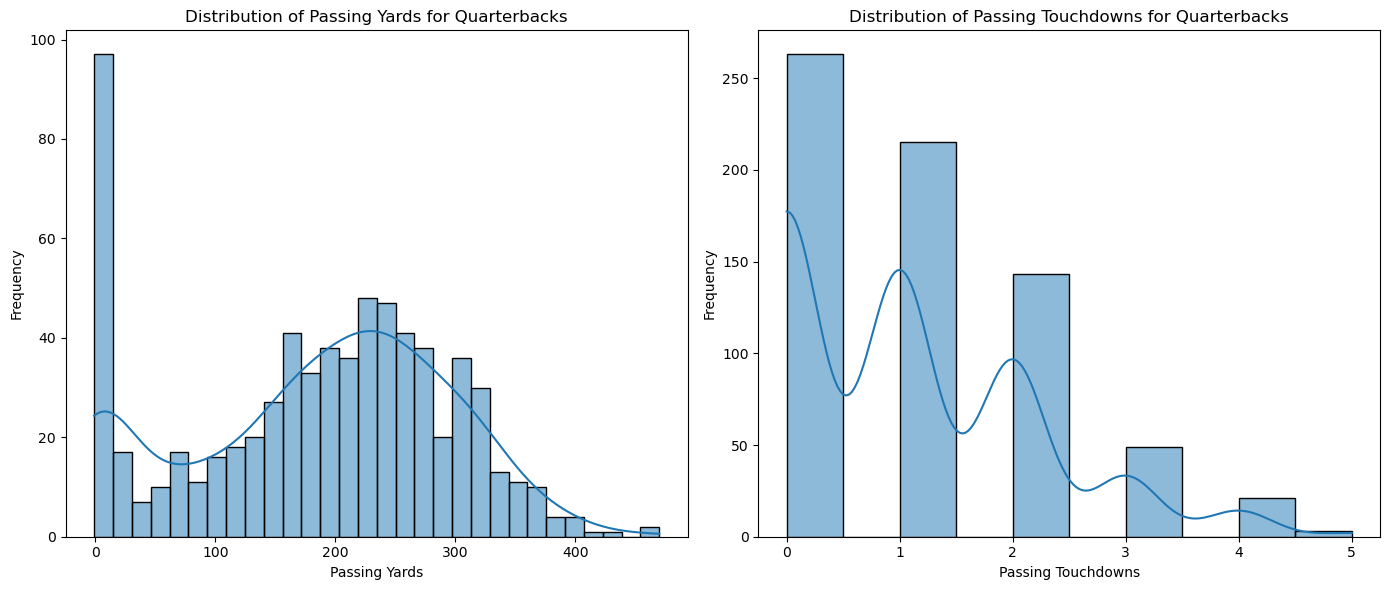

In [50]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=qbs, x='PASSING YDS', kde=True, bins=30)
plt.title('Distribution of Passing Yards for Quarterbacks')
plt.xlabel('Passing Yards')
plt.ylabel('Frequency')
#plotting the Passing Yards distribution

plt.subplot(1, 2, 2)
sns.histplot(data=qbs, x='PASSING TD', kde=True, bins=10)
plt.title('Distribution of Passing Touchdowns for Quarterbacks')
plt.xlabel('Passing Touchdowns')
plt.ylabel('Frequency')
#plotting rushing yards distribution

plt.tight_layout()
plt.show()

- Passing Yards
    - Skewed right, with many players having low or zero passing yards
    - Majority of values are below 200, with a gradual decline up to the maximum of around 470
    - Indicates a typical quarterback distribution, where higher passing yards are less common

- Passing Touchdowns
    - Heavily right-skewed, with most players recording zero or one passing touchdown
    - The majority of values are concentrated at 0, 1, and 2 touchdowns, indicating that scoring multiple passing touchdowns is relatively rare
    - There are a few instances of 4 and 5 touchdowns, representing exceptional performances
    - The data suggests that high passing touchdown games are infrequent, which aligns with typical quarterback performance distribution

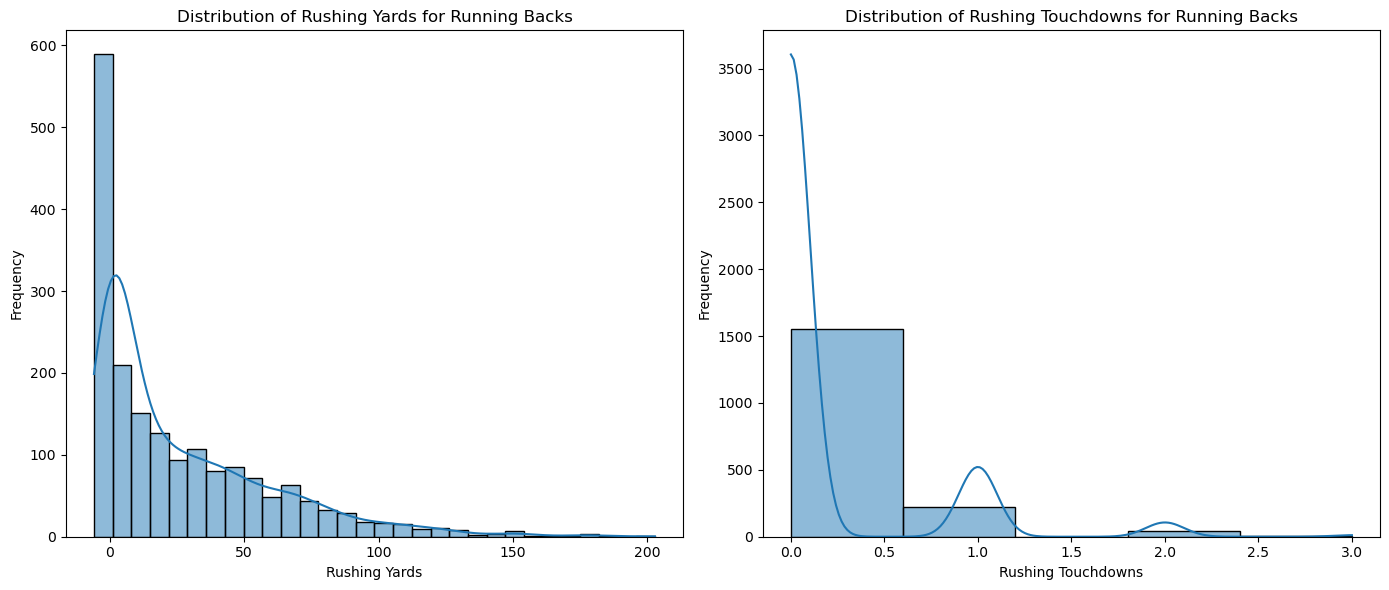

In [51]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=rbs, x='RUSHING YDS', kde=True, bins=30)
plt.title('Distribution of Rushing Yards for Running Backs')
plt.xlabel('Rushing Yards')
plt.ylabel('Frequency')
#plotting rushing yards distribution

plt.subplot(1, 2, 2)
sns.histplot(data=rbs, x='RUSHING TD', kde=True, bins=5)
plt.title('Distribution of Rushing Touchdowns for Running Backs')
plt.xlabel('Rushing Touchdowns')
plt.ylabel('Frequency')
#plotting rushing touchdowns distribution

plt.tight_layout()
plt.show()

- Rushing Yards:
    - Heavily right-skewed, with the majority of values concentrated at low rushing yard totals
    - Most running backs have fewer than 50 rushing yards, with a few reaching up to 200
    - This distribution reflects that high rushing yard performances are relatively rare

- Rushing Touchdowns:
    - Extremely right-skewed, with the majority of running backs scoring zero touchdowns
    - Few players have 1 or more rushing touchdowns, indicating that scoring a rushing touchdown is uncommon
    - A very small number of players reach 2 or 3 touchdowns, representing standout performances

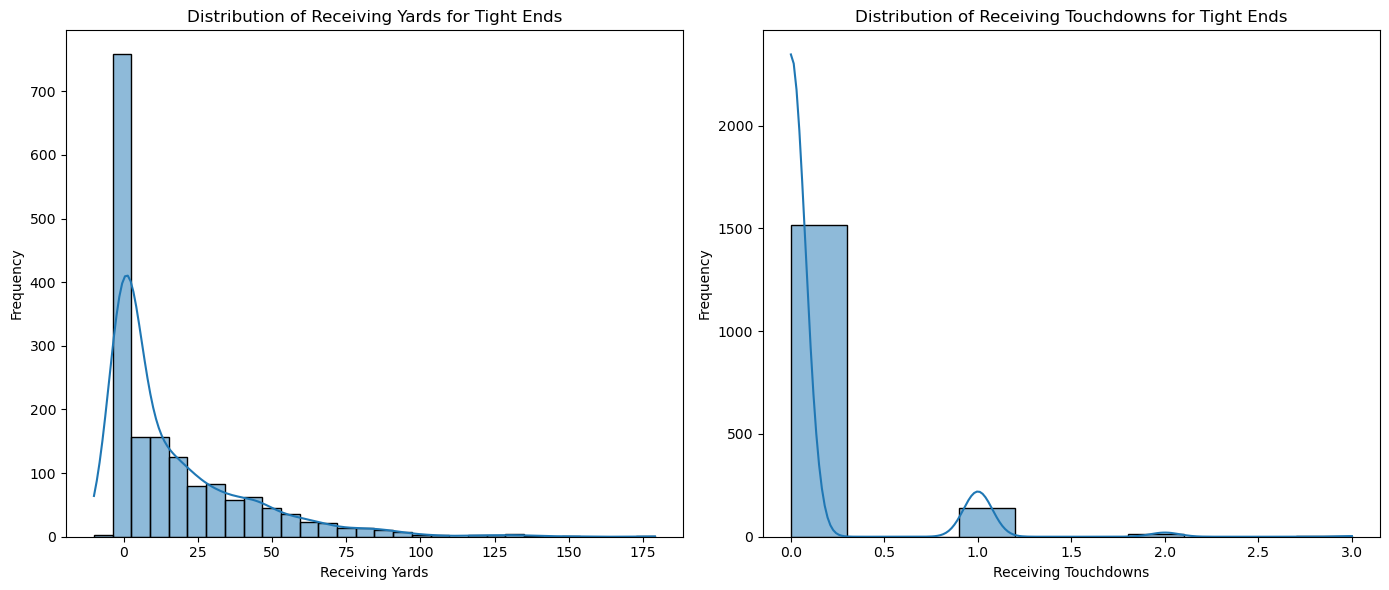

In [52]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=tes, x='RECEIVING YDS', kde=True, bins=30)
plt.title('Distribution of Receiving Yards for Tight Ends')
plt.xlabel('Receiving Yards')
plt.ylabel('Frequency')
#plotting receiving yards distribution

plt.subplot(1, 2, 2)
sns.histplot(data=tes, x='RECEIVING TD', kde=True, bins=10)
plt.title('Distribution of Receiving Touchdowns for Tight Ends')
plt.xlabel('Receiving Touchdowns')
plt.ylabel('Frequency')
#plotting rushing touchdowns distribution

plt.tight_layout()
plt.show()

- Receiving Yards
    - Right-skewed, with the majority of tight ends having low receiving yard totals
    - Most values are clustered below 25 yards, with a gradual decline for higher yardages up to a maximum around 175
    - Reflects that high receiving yard games are less common for tight ends
- Receiving Touchdowns
    - Extremely right-skewed, with most tight ends scoring zero touchdowns
    - A small number of tight ends have 1 touchdown, with even fewer reaching 2 or more
    - Indicates that scoring touchdowns is relatively rare for tight ends, with standout performances being uncommon

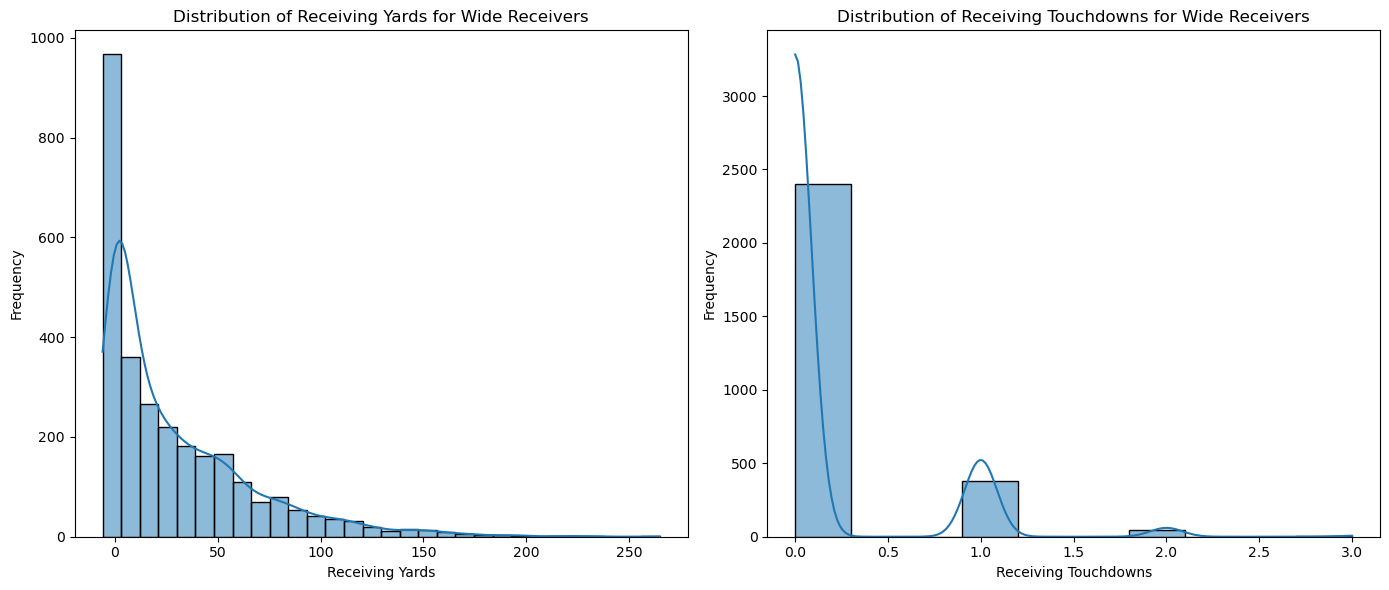

In [53]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=wrs, x='RECEIVING YDS', kde=True, bins=30)
plt.title('Distribution of Receiving Yards for Wide Receivers')
plt.xlabel('Receiving Yards')
plt.ylabel('Frequency')
#plottung receiving yards distribution

plt.subplot(1, 2, 2)
sns.histplot(data=wrs, x='RECEIVING TD', kde=True, bins=10)
plt.title('Distribution of Receiving Touchdowns for Wide Receivers')
plt.xlabel('Receiving Touchdowns')
plt.ylabel('Frequency')
#plotting rushing touchdowns distribution

# Show the plots
plt.tight_layout()
plt.show()

- Receiving Yards:
    - Right-skewed, with the majority of values at low yardage totals
    - Most wide receivers have fewer than 50 receiving yards, with a long tail extending to about 250 yards
    - This distribution indicates that high receiving yard games are relatively rare but more common than for other positions

- Receiving Touchdowns:
    - Strongly right-skewed, with most wide receivers scoring zero touchdowns
    - A small group of wide receivers scores 1 touchdown, and very few reach 2 or more
    - Reflects that scoring multiple touchdowns in a game is uncommon for wide receivers, though they have slightly higher touchdown frequencies compared to tight ends


In [54]:
dataframes = [qbs, rbs, tes, wrs]
#creating list of dataframes

for df in dataframes:
    df['Win_Loss'] = df['STATUS'].apply(lambda x: 1 if x.startswith('W') else 0)
#looping through list of dataframes and creating dummy variable based on if the first letter in status is 'W'

qbs.head(5)
#ensuring it has been created

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week,Free_Agent,did_not_play,Win_Loss
2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,17.0,...,21.0,25.0,Mia,Home,1.0,10-03-23,4,False,0,1
7,Anthony Richardson,Ind,QB,L 23-29,20.2,200.0,2.0,0.0,10.0,56.0,...,11.0,25.0,LAR,Home,2.0,10-03-23,4,False,0,0
8,Lamar Jackson,Bal,QB,W 28-3,17.9,186.0,2.0,0.0,9.0,27.0,...,15.0,19.0,Cle,Away,3.0,10-03-23,4,False,0,1
10,Justin Fields,Chi,QB,L 28-31,20.0,335.0,4.0,1.0,4.0,25.0,...,28.0,35.0,Den,Home,4.0,10-03-23,4,False,0,0
20,Jalen Hurts,Phi,QB,W 34-31,21.7,319.0,2.0,0.0,9.0,34.0,...,25.0,37.0,Wsh,Home,5.0,10-03-23,4,False,0,1


- Creating dummy variable to help determine wins or losses based on if the first letter in status is 'W'

/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


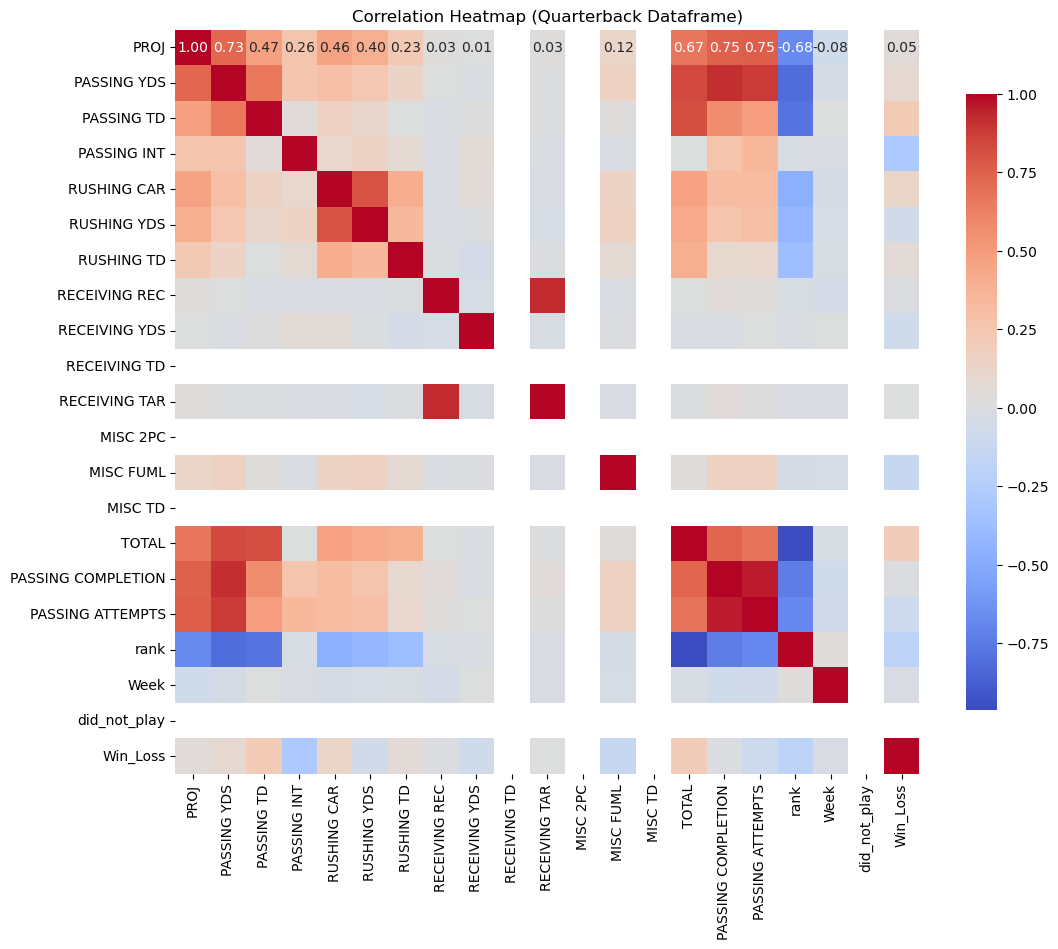

In [55]:
qbsNumeric = qbs.select_dtypes(include=['number'])
#creating dataframe with numeric variables within the quarterback dataframe
qbCorrelationMatrix = qbsNumeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(qbCorrelationMatrix, annot=True, fmt='.2f', cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap (Quarterback Dataframe)')
plt.show()
#plotting correlation heatmap

- Strong Positive Correlations with 'Total':
    - PASSING YDS (0.83): Total score is highly influenced by passing yards, indicating that quarterbacks with more passing yards tend to score higher overall
    - PASSING COMPLETION (0.74): More completed passes contribute significantly to the total score, highlighting the importance of accuracy
    - PASSING TD (0.82): Passing touchdowns are strongly correlated with total score, suggesting that scoring touchdowns is a major factor in higher totals
    - PASSING ATTEMPTS (0.68): More passing attempts have a moderate positive impact on the total score, likely because higher attempts can lead to more completions and yards
- Moderate Positive Correlations with 'Total':
    - RUSHING YDS (0.46) and RUSHING CAR (0.46): While not as influential as passing stats, rushing yards and attempts contribute moderately to the total, indicating that quarterbacks who can run add some value to their total score
- Negative Correlations with 'Total':
    - rank (-0.68): There is a moderate negative correlation with rank, meaning that higher total scores are associated with better rankings (lower rank values)
Weak or No Correlations with 'Total':
- MISC FUML and RECEIVING stats show little to no correlation with TOTAL, implying that these factors have minimal impact on a quarterback's total score
- In summary, TOTAL is most strongly correlated with passing metrics, especially yards, touchdowns, and completions, with rushing stats adding moderate value

/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap (Runningback Dataframe)')

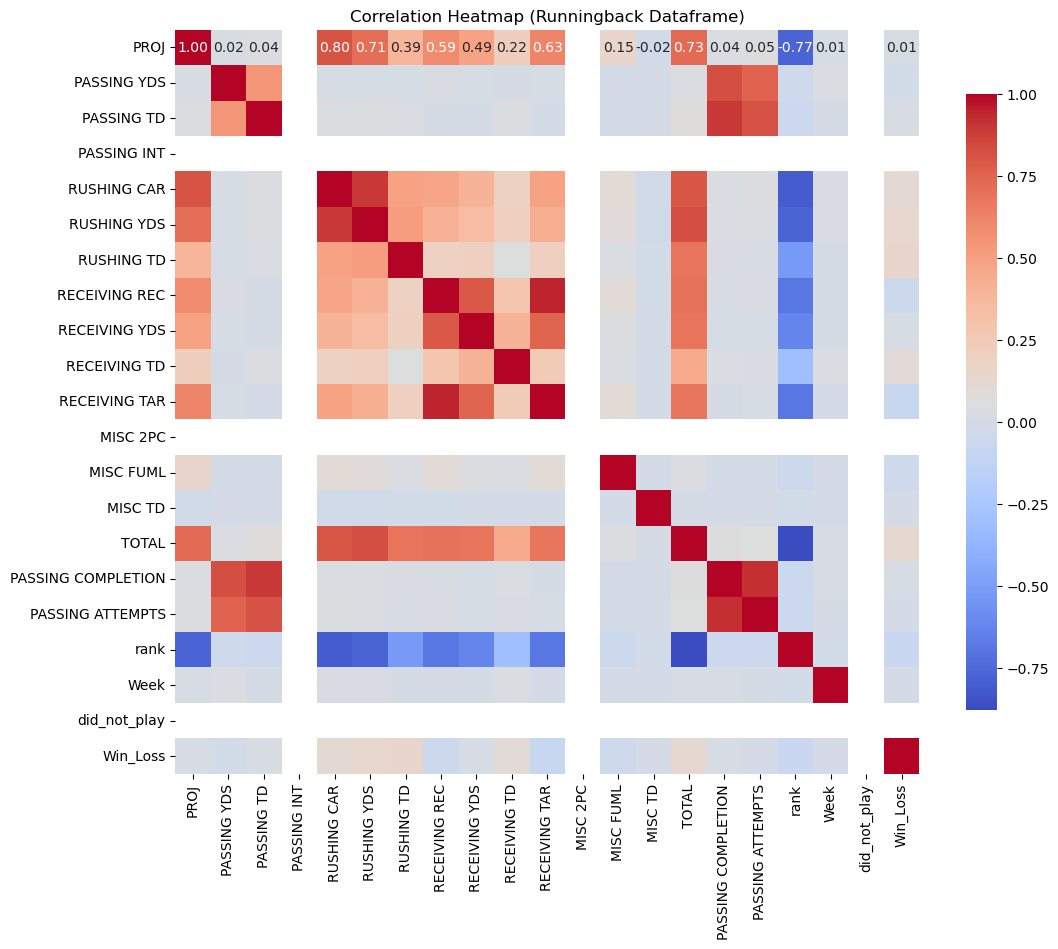

In [56]:
rbsNumeric = rbs.select_dtypes(include=['number'])
#creating dataframe with numeric variables within the quarterback dataframe

rbCorrelationMatrix = rbsNumeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(rbCorrelationMatrix, annot=True, fmt='.2f', cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap (Runningback Dataframe)')
#plotting correlation heatmap

- Strong Positive Correlations with 'Total':
    - RUSHING YDS (0.83): Total score is strongly influenced by rushing yards, showing that higher rushing yards significantly boost the total
    - RUSHING CAR (0.79): Rushing attempts also have a strong positive impact on the total score, indicating that more attempts contribute to a higher total
    - RUSHING TD (0.69): Rushing touchdowns are positively correlated with total score, suggesting that scoring touchdowns is important for increasing the total
- Moderate Positive Correlations with 'Total':
    - RECEIVING REC (0.69) and RECEIVING YDS (0.69): Receiving yards and receptions moderately contribute to the total score, indicating that running backs who are active in receiving add value to their total
    - RECEIVING TAR (0.63): Receiving targets are also moderately correlated with the total, which aligns with the contribution of receptions and yards to the total
- Weak or No Correlations with 'Total':
    - MISC FUML and MISC TD show little to no correlation with TOTAL, indicating minimal impact on the total score from miscellaneous stats
    - PASSING stats have little to no correlation, as passing is not typically a primary function of running backs
- In summary, for running backs 'TOTAL' is most strongly correlated with rushing stats (yards, attempts, touchdowns) and moderately correlated with receiving stats, reflecting the dual role of running backs in rushing and receiving

/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap (Tight End Dataframe)')

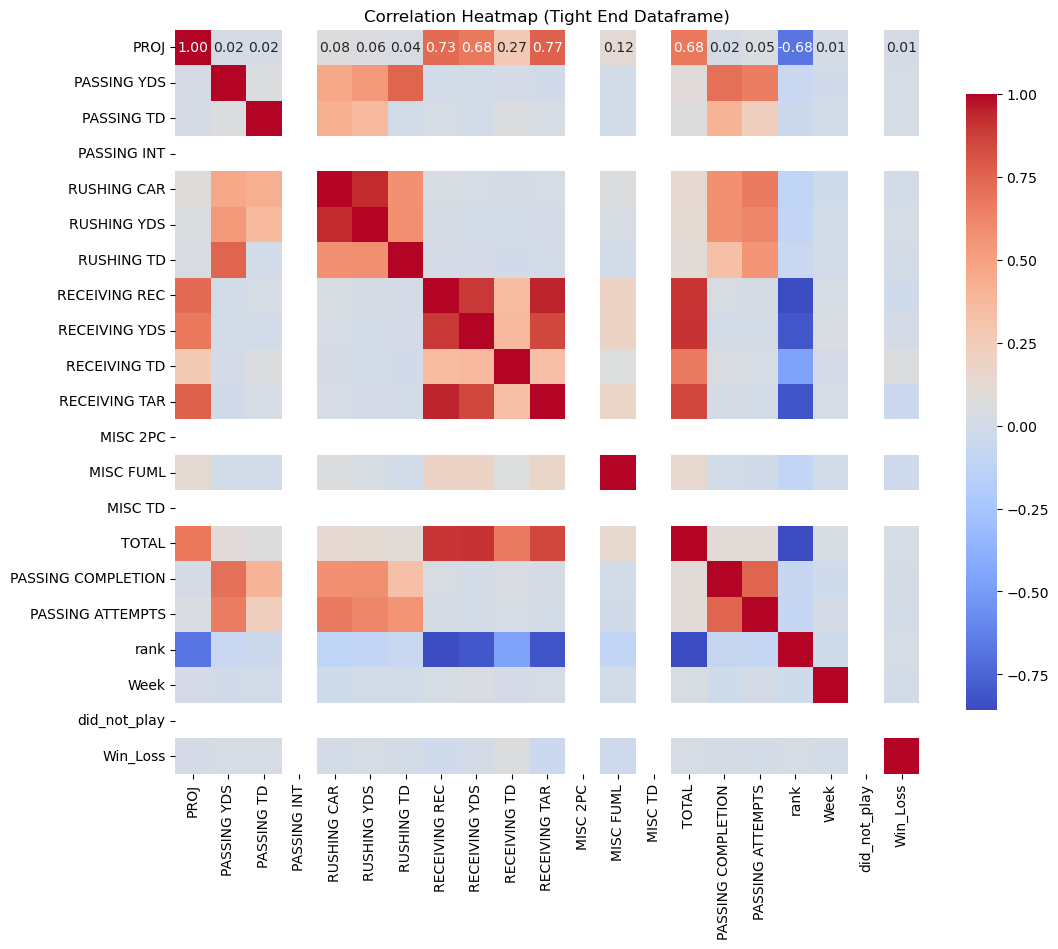

In [57]:
tesNumeric = tes.select_dtypes(include=['number'])
#creating dataframe with numeric variables within the quarterback dataframe

teCorrelationMatrix = tesNumeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(teCorrelationMatrix, annot=True, fmt='.2f', cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap (Tight End Dataframe)')
#plotting correlation heatmap

- Strong Positive Correlations with 'Total':
    - RECEIVING REC (0.91): Total score is strongly correlated with receptions, indicating that tight ends who catch more passes contribute significantly to their total score
    - RECEIVING YDS (0.67): Receiving yards are also strongly correlated with total, showing that yardage gained through receiving is an important factor in the total score
    - RECEIVING TAR (0.67): Receiving targets moderately correlate with total, likely due to the link between targets, receptions, and receiving yards
- Moderate Positive Correlations with 'Total':
    - RECEIVING TD (0.33): Receiving touchdowns have a moderate positive impact on the total score, showing that while touchdowns contribute to the total, they are less impactful than receptions and yards for tight ends
    - PASSING COMPLETION (0.41): Surprisingly, passing completions show some correlation, though this could be an anomaly as tight ends generally don’t pass
- Weak or No Correlations with 'Total':
    - RUSHING and MISC stats show weak or no correlation with TOTAL, indicating minimal impact on the total score for tight ends
    - PASSING YDS and PASSING TD also have little to no correlation, as passing is not a typical role for tight ends
- In summary, TOTAL for tight ends is most strongly influenced by receiving metrics (receptions, yards, and targets), reflecting their primary role in catching passes
    - Touchdowns have a moderate impact, while other types of stats are largely irrelevant

/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap (Wide Receiver Dataframe)')

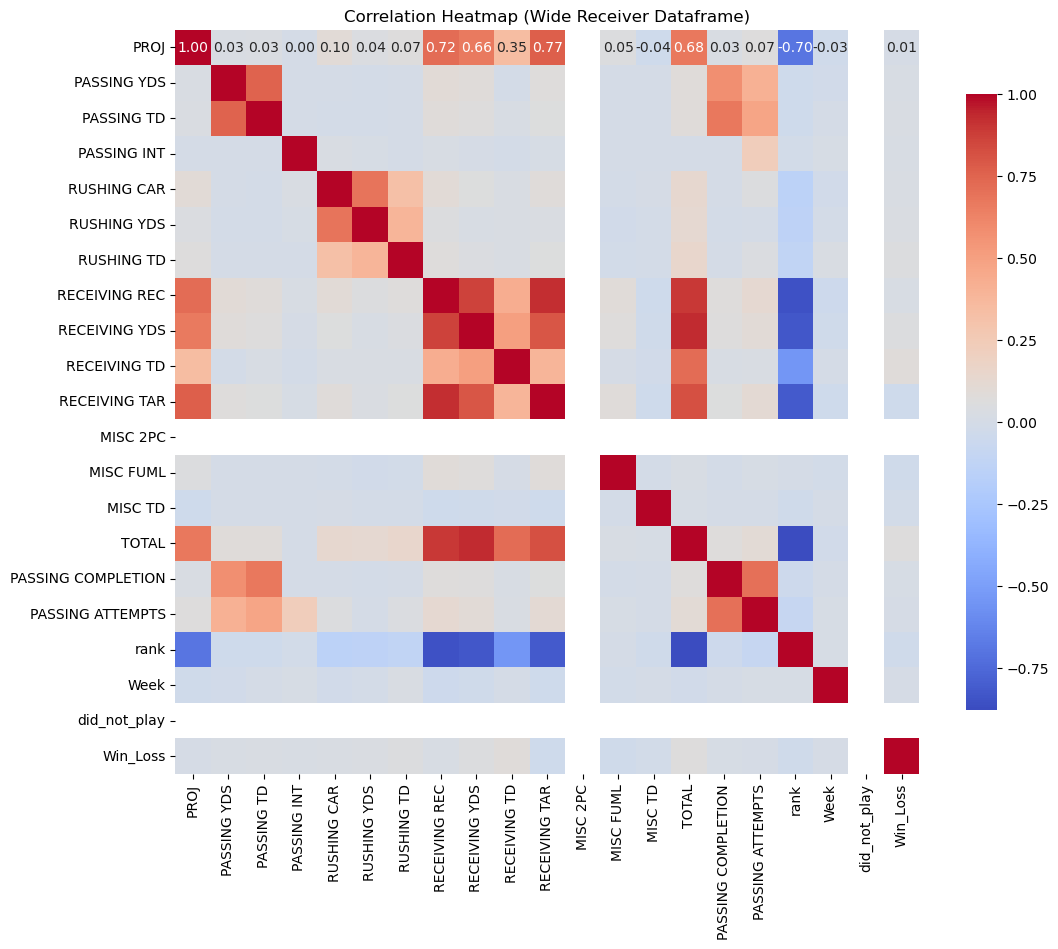

In [58]:
wrsNumeric = wrs.select_dtypes(include=['number'])
#creating dataframe with numeric variables within the quarterback dataframe
wrsCorrelationMatrix = wrsNumeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(wrsCorrelationMatrix, annot=True, fmt='.2f', cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap (Wide Receiver Dataframe)')
#plotting correlation heatmap

- Strong Positive Correlations with 'Total':
    - RECEIVING REC (0.93): Total score is highly correlated with receptions, showing that the number of catches contributes significantly to the wide receiver's total score
    - RECEIVING YDS (0.82): Receiving yards also have a strong correlation with total, emphasizing the importance of yardage in the total score
    - RECEIVING TAR (0.82): Receiving targets correlate strongly with total, likely because more targets can lead to more receptions and yards
- Moderate Positive Correlations with 'Total':
    - RECEIVING TD (0.54): Receiving touchdowns moderately impact the total score, indicating that scoring touchdowns boosts the total but is less influential than receptions and yards
- Weak or No Correlations with 'Total':
    - RUSHING stats and MISC stats show weak or no correlation with TOTAL, suggesting that these do not meaningfully affect the total score for wide receivers
    - PASSING stats also have little to no correlation, as wide receivers typically do not engage in passing
- In summary, TOTAL for wide receivers is most influenced by receiving metrics (receptions, yards, and targets), with touchdowns providing a moderate boost
    - Rushing and miscellaneous stats have minimal impact on the total score for wide receivers

In [59]:
dataframes = [qbs, rbs, tes, wrs]
#creating list of dataframes

for df in dataframes:
    df['Win_Loss'] = df['STATUS'].apply(lambda x: 1 if x.startswith('W') else 0)
#looping through list of dataframes and creating dummy variable based on if the first letter in status is 'W'

qbs.head(5)
#ensuring it has been created

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week,Free_Agent,did_not_play,Win_Loss
2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,17.0,...,21.0,25.0,Mia,Home,1.0,10-03-23,4,False,0,1
7,Anthony Richardson,Ind,QB,L 23-29,20.2,200.0,2.0,0.0,10.0,56.0,...,11.0,25.0,LAR,Home,2.0,10-03-23,4,False,0,0
8,Lamar Jackson,Bal,QB,W 28-3,17.9,186.0,2.0,0.0,9.0,27.0,...,15.0,19.0,Cle,Away,3.0,10-03-23,4,False,0,1
10,Justin Fields,Chi,QB,L 28-31,20.0,335.0,4.0,1.0,4.0,25.0,...,28.0,35.0,Den,Home,4.0,10-03-23,4,False,0,0
20,Jalen Hurts,Phi,QB,W 34-31,21.7,319.0,2.0,0.0,9.0,34.0,...,25.0,37.0,Wsh,Home,5.0,10-03-23,4,False,0,1


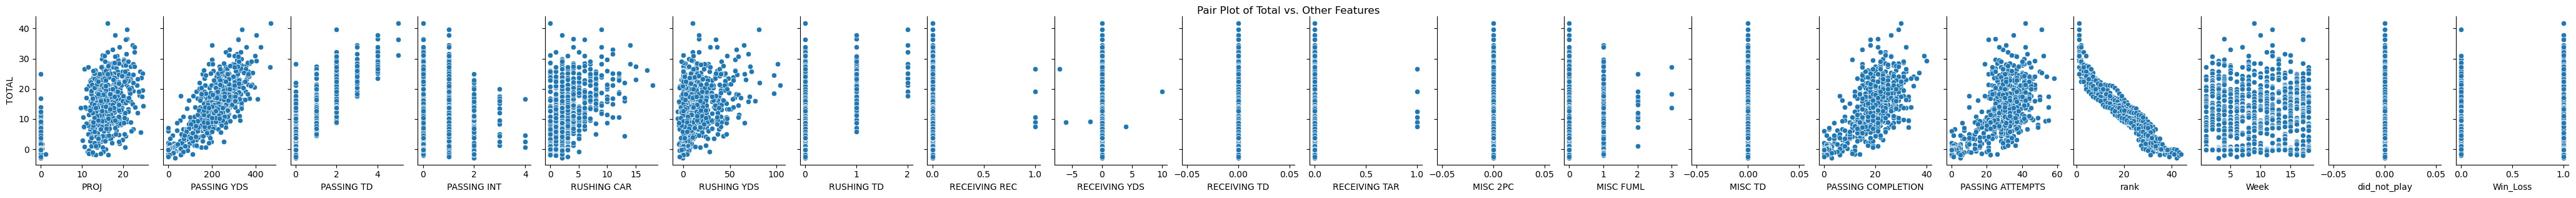

In [60]:
# Select 'Total' and all other numeric columns in the dataframe
columns = ['TOTAL'] + [col for col in qbs.columns if col != 'TOTAL' and qbs[col].dtype in ['float64', 'int64']]

# Plot pairwise relationships only between 'Total' and other selected columns
sns.pairplot(qbs[columns], y_vars='TOTAL', x_vars=columns[1:], height=3, aspect=0.7)
plt.suptitle('Pair Plot of Total vs. Other Features', y=1.02)
plt.show()

- Strong Positive Correlations: Total shows clear linear relationships with Proj (projections), Passing Yards, Passing Touchdowns, and Passing Completion.
- Moderate Correlation: Some alignment with Rushing Yards and Passing Attempts, indicating a weaker but relevant influence on Total.
- Low or No Correlation: Metrics like Receiving TD, Receiving YDS, Misc 2PC, and Misc TD show minimal impact, as expected for quarterbacks.
- Distinct Patterns: Rank has an inverse relationship with Total, suggesting that higher total scores correspond with better player rankings.

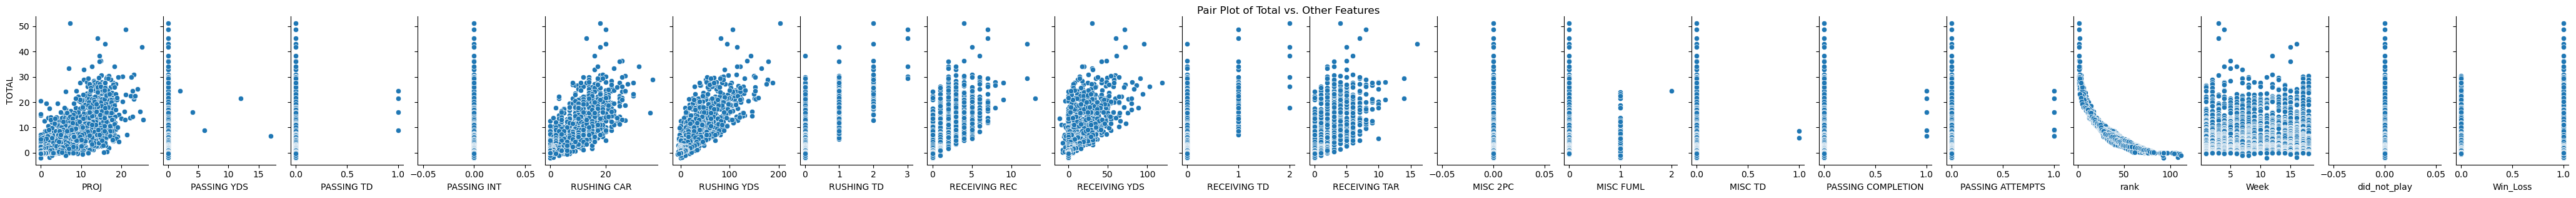

In [61]:
# Select 'Total' and all other numeric columns in the dataframe
columns = ['TOTAL'] + [col for col in rbs.columns if col != 'TOTAL' and rbs[col].dtype in ['float64', 'int64']]

# Plot pairwise relationships only between 'Total' and other selected columns
sns.pairplot(rbs[columns], y_vars='TOTAL', x_vars=columns[1:], height=3, aspect=0.7)
plt.suptitle('Pair Plot of Total vs. Other Features', y=1.02)
plt.show()

- Strong Positive Correlations: Total shows clear relationships with Proj, Rushing Yards, Rushing TD, and Receiving YDS, highlighting these as key contributors
- Moderate Correlation: Receiving REC and Receiving TAR show moderate influence on Total
- Low or No Correlation: Metrics like Misc 2PC, Misc FUML, and Misc TD have minimal impact, indicating limited relevance
- Inverse Relationship: Rank has a strong inverse relationship with Total, aligning higher scores with better rankings

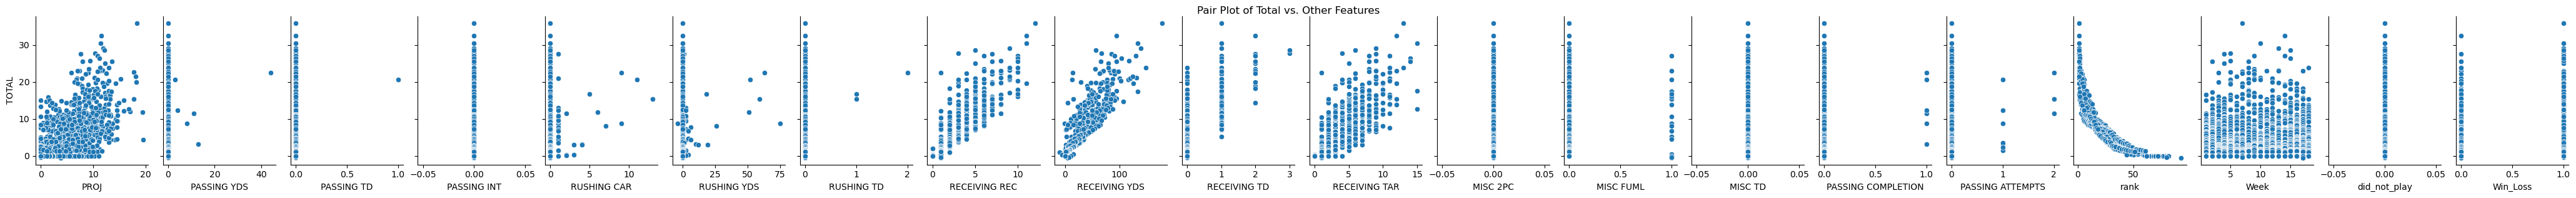

In [62]:
# Select 'Total' and all other numeric columns in the dataframe
columns = ['TOTAL'] + [col for col in tes.columns if col != 'TOTAL' and tes[col].dtype in ['float64', 'int64']]

# Plot pairwise relationships only between 'Total' and other selected columns
sns.pairplot(tes[columns], y_vars='TOTAL', x_vars=columns[1:], height=3, aspect=0.7)
plt.suptitle('Pair Plot of Total vs. Other Features', y=1.02)
plt.show()

- Strong Positive Correlations: Total shows strong relationships with Receiving REC, Receiving YDS, and Receiving TAR, indicating their importance
- Moderate Influence: Proj and Rushing YDS have moderate effects on Total
- Low or No Correlation: Features like Passing YDS, Passing TD, and Misc metrics show minimal impact, as expected for non-passing roles
- Inverse Relationship: Rank has an inverse correlation with Total, where higher scores correlate with better ranks

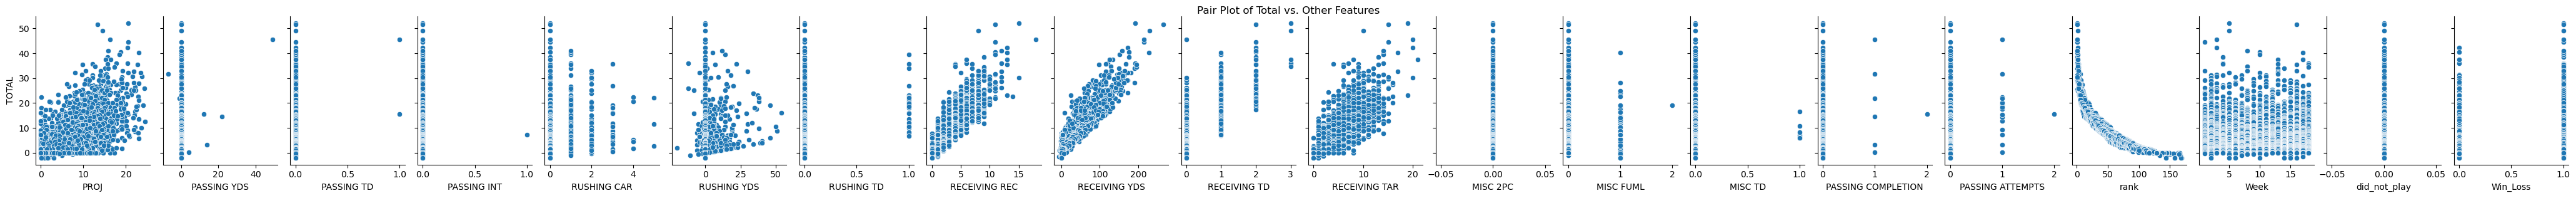

In [63]:
# Select 'Total' and all other numeric columns in the dataframe
columns = ['TOTAL'] + [col for col in wrs.columns if col != 'TOTAL' and wrs[col].dtype in ['float64', 'int64']]

# Plot pairwise relationships only between 'Total' and other selected columns
sns.pairplot(wrs[columns], y_vars='TOTAL', x_vars=columns[1:], height=3, aspect=0.7)
plt.suptitle('Pair Plot of Total vs. Other Features', y=1.02)
plt.show()

- Strong Positive Correlations: Total has strong relationships with Proj, Receiving REC, Receiving YDS, and Receiving TAR—key metrics for scoring
- Moderate Influence: Rushing YDS and Rushing TD show moderate correlations with Total
- Low or No Correlation: Features like Passing YDS, Passing TD, and Misc metrics have minimal impact, which aligns with the focus on receiving and rushing
- Inverse Relationship: Rank has a strong inverse correlation with Total, where higher fantasy points correlate with better rankings

In [64]:
qbs.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,RUSHING YDS,...,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week,Free_Agent,did_not_play,Win_Loss
2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,17.0,...,21.0,25.0,Mia,Home,1.0,10-03-23,4,False,0,1
7,Anthony Richardson,Ind,QB,L 23-29,20.2,200.0,2.0,0.0,10.0,56.0,...,11.0,25.0,LAR,Home,2.0,10-03-23,4,False,0,0
8,Lamar Jackson,Bal,QB,W 28-3,17.9,186.0,2.0,0.0,9.0,27.0,...,15.0,19.0,Cle,Away,3.0,10-03-23,4,False,0,1
10,Justin Fields,Chi,QB,L 28-31,20.0,335.0,4.0,1.0,4.0,25.0,...,28.0,35.0,Den,Home,4.0,10-03-23,4,False,0,0
20,Jalen Hurts,Phi,QB,W 34-31,21.7,319.0,2.0,0.0,9.0,34.0,...,25.0,37.0,Wsh,Home,5.0,10-03-23,4,False,0,1


In [65]:
dfAll.to_csv("dfAll.csv")
qbs.to_csv("qbs.csv")
rbs.to_csv("rbs.csv")
wrs.to_csv("wrs.csv")
tes.to_csv("tes.csv")
#converting dataframes to csv

- Transfering dataframes to new folder by converting them to csv's